In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

In [2]:
df_data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
#df_data['NObeyesdad'].value_counts()

In [4]:
# df_x
df_data.loc()[df_data['family_history_with_overweight']=='no','family_history_with_overweight']=0
df_data.loc()[df_data['family_history_with_overweight']=='yes','family_history_with_overweight']=1

df_data.loc()[df_data['FAVC']=='no','FAVC']=0
df_data.loc()[df_data['FAVC']=='yes','FAVC']=1

df_data.loc()[df_data['SMOKE']=='no','SMOKE']=0
df_data.loc()[df_data['SMOKE']=='yes','SMOKE']=1

df_data.loc()[df_data['SCC']=='no','SCC']=0
df_data.loc()[df_data['SCC']=='yes','SCC']=1

df_data.loc()[df_data['CAEC']=='No','CAEC']=1
df_data.loc()[df_data['CAEC']=='no','CAEC']=1
df_data.loc()[df_data['CAEC']=='Sometimes','CAEC']=2
df_data.loc()[df_data['CAEC']=='Frequently','CAEC']=3
df_data.loc()[df_data['CAEC']=='Always','CAEC']=4

df_data.loc()[df_data['CALC']=='no','CALC']=1
df_data.loc()[df_data['CALC']=='Sometimes','CALC']=2
df_data.loc()[df_data['CALC']=='Frequently','CALC']=3
df_data.loc()[df_data['CALC']=='Always','CALC']=4

df_data.loc()[df_data['Gender']=='Female','Gender']=0
df_data.loc()[df_data['Gender']=='Male','Gender']=1
df_data
df_data.loc()[df_data['MTRANS']=='Public_Transportation','MTRANS']=0
df_data.loc()[df_data['MTRANS']=='Walking','MTRANS']=1

df_data.loc()[df_data['NObeyesdad']=='Normal_Weight','NObeyesdad']=0
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_I','NObeyesdad']=1
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_II','NObeyesdad']=2

df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_III','NObeyesdad']=3

df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_I','NObeyesdad']=4
df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_II','NObeyesdad']=5
df_data.loc()[df_data['NObeyesdad']=='Insufficient_Weight','NObeyesdad']=6

In [5]:
df_data[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']]=df_data[
    ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']
].astype(int)


In [6]:
df_x=df_data.drop(['NObeyesdad'],axis=1)
df_y=df_data.loc[:,'NObeyesdad']

x = pd.get_dummies(df_x)
y = pd.get_dummies(df_y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
#資料前處理

In [8]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                704       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 77    

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 598us/step - loss: 2.4341 - precision: 0.0570 - recall: 0.0052 - accuracy: 0.0000e+00 
Epoch 2/50
338/338 [==============================] - 0s 543us/step - loss: 1.9071 - precision: 0.2117 - recall: 0.0013 - accuracy: 0.0000e+00
Epoch 3/50
338/338 [==============================] - 0s 539us/step - loss: 1.8023 - precision: 0.4566 - recall: 0.0138 - accuracy: 0.0000e+00
Epoch 4/50
338/338 [==============================] - 0s 530us/step - loss: 1.6920 - precision: 0.5833 - recall: 0.0499 - accuracy: 0.0000e+00
Epoch 5/50
338/338 [==============================] - 0s 530us/step - loss: 1.4769 - precision: 0.5363 - recall: 0.0884 - accuracy: 0.0000e+00
Epoch 6/50
338/338 [==============================] - 0s 521us/step - loss: 1.2983 - precision: 0.6474 - recall: 0.1535 - accuracy: 0.0000e+00
Epoch 7/50
338/338 [==============================] - 0s 568us/step - loss: 1.2492 - precision: 0.5861 - recall: 0.1739 - accuracy: 8.8328e-0

338/338 [==============================] - 0s 518us/step - loss: 0.9190 - precision: 0.7785 - recall: 0.4123 - accuracy: 0.0764
Epoch 31/50
338/338 [==============================] - 0s 553us/step - loss: 0.8726 - precision: 0.8018 - recall: 0.4458 - accuracy: 0.0869
Epoch 32/50
338/338 [==============================] - 0s 567us/step - loss: 0.8710 - precision: 0.7782 - recall: 0.4360 - accuracy: 0.1005
Epoch 33/50
338/338 [==============================] - 0s 532us/step - loss: 0.8646 - precision: 0.7512 - recall: 0.4419 - accuracy: 0.0969
Epoch 34/50
338/338 [==============================] - 0s 530us/step - loss: 0.9382 - precision: 0.7516 - recall: 0.3853 - accuracy: 0.0903
Epoch 35/50
338/338 [==============================] - 0s 521us/step - loss: 0.8599 - precision: 0.7834 - recall: 0.4626 - accuracy: 0.0922
Epoch 36/50
338/338 [==============================] - 0s 521us/step - loss: 0.8643 - precision: 0.7915 - recall: 0.4731 - accuracy: 0.1013
Epoch 37/50
338/338 [===========

In [10]:
preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print(preds)
print(F1)

14/14 [==============================] - 0s 614us/step - loss: 0.5950 - precision: 0.8658 - recall: 0.6099 - accuracy: 0.1196
[0.5950068831443787, 0.8657718300819397, 0.609929084777832, 0.11955420672893524]
0.7156726876441423


In [11]:
reds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall}', preds[2])
print('F1',F1)

14/14 [==============================] - 0s 693us/step - loss: 0.5950 - precision: 0.8658 - recall: 0.6099 - accuracy: 0.1196
Precision 0.8657718300819397
Recall} 0.609929084777832
F1 0.7156726876441423


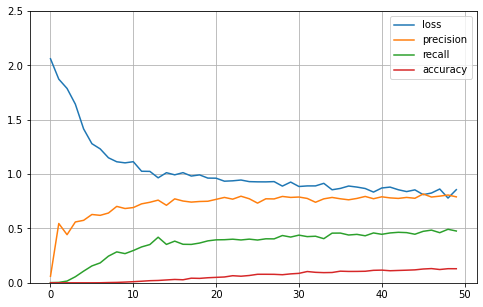

In [12]:

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [13]:
df_test_y_predicted = model.predict(x_test)

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error
print('RMSE为：',np.sqrt(mean_squared_error(y_test,df_test_y_predicted)))

RMSE为： 0.22380966


In [15]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_errorS
print('MAPE为：',mean_squared_error(y_test,df_test_y_predicted))

MAPE为： 0.050090764


In [16]:
from sklearn.metrics import mean_absolute_error
print('MAE为：',mean_absolute_error(y_test,df_test_y_predicted))

MAE为： 0.10846363


# value

In [17]:
df_data.drop(['NObeyesdad'],axis=1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,0


In [18]:
df_x=df_data.drop(['Height'],axis=1)

df_y=df_data.loc[:,'Height']

In [19]:
x = pd.get_dummies(df_x)
y = df_y

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(1)(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                896       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11  

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=[tf.keras.losses.mae,tf.keras.losses.mape],
              metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape]
              
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 500us/step - loss: 0.9870 - mean_absolute_error: 0.9870 - mean_absolute_percentage_error: 58.0820
Epoch 2/50
338/338 [==============================] - 0s 488us/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 18.8519
Epoch 3/50
338/338 [==============================] - 0s 494us/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 7.7912
Epoch 4/50
338/338 [==============================] - 0s 506us/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 4.3483
Epoch 5/50
338/338 [==============================] - 0s 491us/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 4.0491
Epoch 6/50
338/338 [==============================] - 0s 500us/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 3.7851
Epoch 7/50
338/338 [==============================] - 0s 500us/step - loss

callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=["mean_squared_error"],metrics=['mean_squared_error','mean_absolute_error'])
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

In [27]:
df_test_y_predicted = model.predict(x_test)
df_test_y_predicted

array([[1.7376603],
       [1.7587336],
       [1.7362286],
       [1.675612 ],
       [1.7446326],
       [1.7266747],
       [1.6686889],
       [1.7153231],
       [1.6338176],
       [1.6571162],
       [1.7035944],
       [1.7389561],
       [1.6884967],
       [1.7034175],
       [1.651805 ],
       [1.6638464],
       [1.7056302],
       [1.7056302],
       [1.6566106],
       [1.7401729],
       [1.6576087],
       [1.7631546],
       [1.6568007],
       [1.6477927],
       [1.7386667],
       [1.7617065],
       [1.6901016],
       [1.7056302],
       [1.7677594],
       [1.7358845],
       [1.7255319],
       [1.65836  ],
       [1.6669555],
       [1.6761172],
       [1.7290841],
       [1.720622 ],
       [1.6833291],
       [1.7357756],
       [1.7354738],
       [1.732702 ],
       [1.6438048],
       [1.6629468],
       [1.719769 ],
       [1.7056302],
       [1.68092  ],
       [1.7365031],
       [1.7653786],
       [1.6629926],
       [1.7317355],
       [1.6741805],


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error
print('RMSE为：',np.sqrt(mean_squared_error(y_test,df_test_y_predicted)))

RMSE为： 0.06562598082319877


In [29]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
print('MAPE为：',mean_squared_error(y_test,df_test_y_predicted))

MAPE为： 0.004306769359006854


In [30]:
from sklearn.metrics import mean_absolute_error
print('MAE为：',mean_absolute_error(y_test,df_test_y_predicted))

MAE为： 0.052006287993212406
